In [13]:
import nltk
nltk.download('punkt')  # Download sentence tokenizer
nltk.download('averaged_perceptron_tagger')  # Download POS tagger
from nltk import word_tokenize, pos_tag, FreqDist
nltk.download('stopwords')
from textblob import TextBlob  # Sentiment analysis
from collections import Counter  # Counter for trigrams
from wordcloud import WordCloud  # Wordcloud generation
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
with open("../transcripts/meeting003.txt", "r") as f:
    text = f.read()
sentences = nltk.sent_tokenize(text)


In [15]:
# Tokenize sentences into words and filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [[word.lower() for word in word_tokenize(sentence) if word.lower() not in stop_words] for sentence in sentences]

# Flatten the list of tokens
all_words = [word for sentence_words in filtered_tokens for word in sentence_words]

# Perform part-of-speech tagging
pos_tags = pos_tag(all_words)

# Extract trigrams (collocations)
trigrams = nltk.trigrams(all_words)

# Count frequencies of words
word_freq = FreqDist(all_words)

# Generate word cloud for meaningful words
wordcloud = WordCloud().generate_from_frequencies(word_freq)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/media/mldadmin/home/s123mdg310_03/nltk_data'
    - '/media/mldadmin/home/s123mdg310_03/miniconda3/envs/convo_env/nltk_data'
    - '/media/mldadmin/home/s123mdg310_03/miniconda3/envs/convo_env/share/nltk_data'
    - '/media/mldadmin/home/s123mdg310_03/miniconda3/envs/convo_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


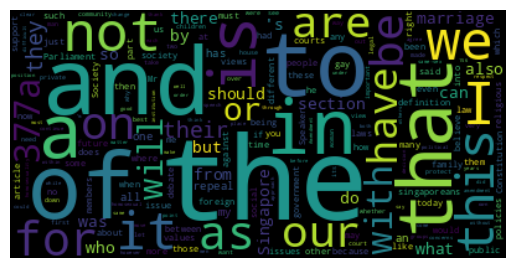

Overall sentiment: 0.08603983017048636
Number of speakers: 10
Speaker names: {'00', '# tactiq.io free youtube transcript', '02', '03', '# https', '01', '# [LIVE] Singapore Parliament debates repealing S377A, law that criminalises sex between men', '04', '06', '05'}
Longest speaker: 01
Least speaker: # tactiq.io free youtube transcript
Average speaking time: 731.4


In [16]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Number of speakers and names of speakers
speakers = [line.split(":")[0].strip() for line in text.split("\n") if line.strip()]
num_speakers = len(set(speakers))
speaker_names = set(speakers)

# Calculate who spoke the longest, least, and average
speaker_times = Counter(speakers)
longest_speaker = max(speaker_times, key=speaker_times.get)
least_speaker = min(speaker_times, key=speaker_times.get)
average_speaker = sum(speaker_times.values()) / len(speaker_times)

print("Overall sentiment:", overall_sentiment)
print("Number of speakers:", num_speakers)
print("Speaker names:", speaker_names)
print("Longest speaker:", longest_speaker)
print("Least speaker:", least_speaker)
print("Average speaking time:", average_speaker)